# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [2]:
# #https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing
# !pip install gdown
# !gdown --id 1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

## Importing Libraries

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder , OneHotEncoder , StandardScaler
from sklearn.model_selection import train_test_split
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt


## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [4]:
df = pd.read_csv('/content/Bus_Breakdown_and_Delays.csv')
df

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147967,2016-2017,1338452,Pre-K/EI,9345,2,Heavy Traffic,C530,04/05/2017 08:00:00 AM,04/05/2017 08:10:00 AM,Bronx,...,15-20,7,Yes,Yes,No,04/05/2017 08:10:00 AM,NaN,04/05/2017 08:10:15 AM,Running Late,Pre-K
147968,2016-2017,1341521,Pre-K/EI,0001,5,Heavy Traffic,C579,04/24/2017 07:42:00 AM,04/24/2017 07:44:00 AM,Bronx,...,20 MINS,0,Yes,Yes,No,04/24/2017 07:44:00 AM,NaN,04/24/2017 07:44:15 AM,Running Late,Pre-K
147969,2016-2017,1353044,Special Ed PM Run,GC0112,X928,Heavy Traffic,09003,05/25/2017 04:22:00 PM,05/25/2017 04:28:00 PM,Bronx,...,20-25MINS,0,Yes,Yes,Yes,05/25/2017 04:28:00 PM,90323827,05/25/2017 04:34:36 PM,Running Late,School-Age
147970,2016-2017,1353045,Special Ed PM Run,5525D,Q920,Won`t Start,24457,05/25/2017 04:27:00 PM,05/25/2017 04:30:00 PM,Queens,...,NaN,0,Yes,Yes,No,05/25/2017 04:30:00 PM,NaN,05/25/2017 04:30:07 PM,Breakdown,School-Age


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Run_Type                         147883 non-null  object
 3   Bus_No                           147972 non-null  object
 4   Route_Number                     147884 non-null  object
 5   Reason                           147870 non-null  object
 6   Schools_Serviced                 147972 non-null  object
 7   Occurred_On                      147972 non-null  object
 8   Created_On                       147972 non-null  object
 9   Boro                             141654 non-null  object
 10  Bus_Company_Name                 147972 non-null  object
 11  How_Long_Delayed                 126342 non-null  object
 12  Number_Of_Studen

In [6]:
df.describe()

,Busbreakdown_ID,Number_Of_Students_On_The_Bus
count,1.479720e+05,147972.000000
mean,1.287779e+06,3.590071
std,4.324338e+04,55.365859
min,1.212681e+06,0.000000
25%,1.250438e+06,0.000000
50%,1.287844e+06,0.000000
75%,1.325191e+06,4.000000
max,1.362605e+06,9007.000000


In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,89
Bus_No,0
Route_Number,88
Reason,102
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,6318


<Axes: ylabel='Number_Of_Students_On_The_Bus'>

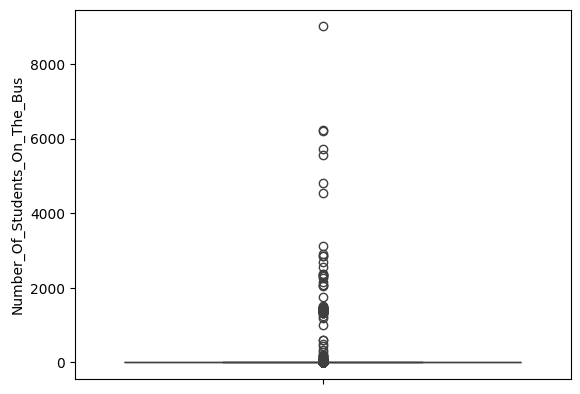

In [9]:
sns.boxplot(df.Number_Of_Students_On_The_Bus)

## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

In [10]:
df = df.drop(columns=['Incident_Number' , 'Busbreakdown_ID' ,'Bus_No'])

In [11]:
# i will drop this column because its have unnecessary

In [12]:
df.isnull().sum()

,0
School_Year,0
Run_Type,89
Route_Number,88
Reason,102
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,6318
Bus_Company_Name,0
How_Long_Delayed,21630


In [13]:
df['Reason'].unique()

array(['Other', 'Heavy Traffic', 'Flat Tire', 'Mechanical Problem',
       'Delayed by School', 'Problem Run', 'Late return from Field Trip',
       'Won`t Start', 'Weather Conditions', 'Accident', nan], dtype=object)

In [14]:
df['Reason']=df['Reason'].replace('Other' , np.nan)

In [15]:
df['Reason'].unique()


array([nan, 'Heavy Traffic', 'Flat Tire', 'Mechanical Problem',
       'Delayed by School', 'Problem Run', 'Late return from Field Trip',
       'Won`t Start', 'Weather Conditions', 'Accident'], dtype=object)

In [16]:
df['Boro'].unique()

array(['Bronx', nan, 'Queens', 'Brooklyn', 'Nassau County', 'Manhattan',
       'Westchester', 'Staten Island', 'All Boroughs', 'Rockland County',
       'Connecticut', 'New Jersey'], dtype=object)

In [17]:
df['How_Long_Delayed'].nunique()

1863

In [ ]:
#  fill the null value using mode because its object type

In [18]:
df['Run_Type'] = df['Run_Type'].fillna(df['Run_Type'].mode()[0])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 18 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Run_Type                         147972 non-null  object
 2   Route_Number                     147884 non-null  object
 3   Reason                           126204 non-null  object
 4   Schools_Serviced                 147972 non-null  object
 5   Occurred_On                      147972 non-null  object
 6   Created_On                       147972 non-null  object
 7   Boro                             141654 non-null  object
 8   Bus_Company_Name                 147972 non-null  object
 9   How_Long_Delayed                 126342 non-null  object
 10  Number_Of_Students_On_The_Bus    147972 non-null  int64 
 11  Has_Contractor_Notified_Schools  147972 non-null  object
 12  Has_Contractor_N

In [ ]:
# faster way to fill missing value in this column

In [20]:
column_missing = df[['Route_Number' ,'Reason' , 'Boro' , 'How_Long_Delayed']]

for col in column_missing:
  df[col] = df[col].fillna(df[col].mode()[0])


In [21]:
df.isnull().sum()

,0
School_Year,0
Run_Type,0
Route_Number,0
Reason,0
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,0
Bus_Company_Name,0
How_Long_Delayed,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 18 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Run_Type                         147972 non-null  object
 2   Route_Number                     147972 non-null  object
 3   Reason                           147972 non-null  object
 4   Schools_Serviced                 147972 non-null  object
 5   Occurred_On                      147972 non-null  object
 6   Created_On                       147972 non-null  object
 7   Boro                             147972 non-null  object
 8   Bus_Company_Name                 147972 non-null  object
 9   How_Long_Delayed                 147972 non-null  object
 10  Number_Of_Students_On_The_Bus    147972 non-null  int64 
 11  Has_Contractor_Notified_Schools  147972 non-null  object
 12  Has_Contractor_N

In [23]:
df.sample(5)

,School_Year,Run_Type,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,Bus_Company_Name,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
139430,2017-2018,Special Ed AM Run,X605,Heavy Traffic,11465,07/06/2017 07:24:00 AM,07/06/2017 07:26:00 AM,Bronx,LOGAN BUS COMPANY INC.,15 mins.,3,Yes,Yes,No,07/06/2017 07:26:00 AM,07/06/2017 10:28:42 AM,Running Late,School-Age
86279,2016-2017,General Ed AM Run,M1265,Weather Conditions,02776,12/12/2016 06:37:00 AM,12/12/2016 06:44:00 AM,Manhattan,SNT BUS INC,20 MINS,0,Yes,No,No,12/12/2016 06:44:00 AM,12/12/2016 06:44:57 AM,Running Late,School-Age
53121,2015-2016,Special Ed Field Trip,Q348,Flat Tire,24009,10/09/2015 09:51:00 AM,10/09/2015 09:54:00 AM,Queens,LORINDA ENT. LTD.,20 MINS,0,Yes,Yes,No,10/09/2015 09:54:00 AM,10/09/2015 09:54:08 AM,Breakdown,School-Age
56184,2015-2016,General Ed PM Run,K9571,Won`t Start,15010,06/24/2016 03:11:00 PM,06/24/2016 03:14:00 PM,Brooklyn,ALL AMERICAN SCHOOL BUS C,20 MINS,10,No,No,No,06/24/2016 03:14:00 PM,06/24/2016 03:14:50 PM,Breakdown,School-Age
61613,2016-2017,Special Ed AM Run,Y949,Heavy Traffic,10024,09/08/2016 07:55:00 AM,09/08/2016 08:07:00 AM,Bronx,"DON THOMAS BUSES, INC. (B",45 MIN,1,Yes,Yes,Yes,09/08/2016 08:07:00 AM,09/08/2016 08:07:31 AM,Running Late,School-Age


In [24]:
df['Number_Of_Students_On_The_Bus'].unique()

array([   5,    3,   12,   11,    4,    0,    2,    1,    6,   15,   18,
          8,    7,   13,   20,    9,   14,   23,   10,   50,   22, 1492,
         19,   25,   17,   26,   44,   27,   31, 1424,   16,   30,   46,
        207,  102, 1011,   21, 1401,   28,   33, 1371,   37,   76,   52,
         40,   24,   51, 1465, 1329,   32,   65,   29, 1472,   47,   35,
       1315, 1749,   43, 1420, 1352, 1500,   60,   45, 1449,   41,  500,
       2368,  138,  156, 9007, 2154,   36,   55, 2312, 4802,   38,   42,
         48, 2045,  430,  610, 5554, 3112, 2680,   49, 2844,   39,   34,
       4533,   63, 6219, 2252, 1240,   66,   53, 2085,   54,  105, 2905,
        209,  157,  172, 2365,   58, 1177,   81,  612,  109,  331, 1331,
         91, 2063, 1402, 1434, 1411, 5718, 2550, 2327, 6209, 2346, 1384,
        280, 2855])

In [25]:
#  i will drop Number_Of_Students_On_The_Bus because there is a lot of outliers ,, if i drop the outlier and fill it with mean the quality of data it will be poor

In [26]:
df = df.drop(columns='Number_Of_Students_On_The_Bus')

In [ ]:
#  check if there is any "nan" or "NAN" values as string

In [27]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Column: {column}")
    print(f"Unique values: {unique_values}\n")

Column: School_Year
Unique values: ['2015-2016' '2016-2017' '2017-2018' '2019-2020']

Column: Run_Type
Unique values: ['Pre-K/EI' 'Special Ed AM Run' 'General Ed AM Run' 'Special Ed PM Run'
 'General Ed PM Run' 'Special Ed Field Trip' 'General Ed Field Trip'
 'Project Read PM Run' 'Project Read AM Run' 'Project Read Field Trip']

Column: Route_Number
Unique values: ['1' '2' 'P640' ... '012' '29AM' '1409B']

Column: Reason
Unique values: ['Heavy Traffic' 'Flat Tire' 'Mechanical Problem' 'Delayed by School'
 'Problem Run' 'Late return from Field Trip' 'Won`t Start'
 'Weather Conditions' 'Accident']

Column: Schools_Serviced
Unique values: ['C353' 'C814' 'C195' ... 'C148' '02654, 02721,' '04377, 04454, 04658']

Column: Occurred_On
Unique values: ['10/26/2015 08:30:00 AM' '10/27/2015 07:10:00 AM'
 '09/18/2015 07:36:00 AM' ... '05/25/2017 04:22:00 PM'
 '05/25/2017 04:27:00 PM' '05/25/2017 04:36:00 PM']

Column: Created_On
Unique values: ['10/26/2015 08:40:00 AM' '10/27/2015 07:11:00 AM'
 '0

In [28]:
df['Bus_Company_Name'].nunique()

91

In [29]:
df['How_Long_Delayed']=df['How_Long_Delayed'].replace('MINS' , ' ')
df['How_Long_Delayed']=df['How_Long_Delayed'].replace(' MINUTES' , ' ')
df['How_Long_Delayed']=df['How_Long_Delayed'].replace('MINUTES' , ' ')


In [30]:
lea = LabelEncoder()

df['How_Long_Delayed'] = lea.fit_transform(df['How_Long_Delayed'])

In [31]:
# in the code below i will change type to time and extract featucer from it

In [32]:
df['Occurred_On']= pd.to_datetime(df['Occurred_On'])

In [33]:
df['Occurred_On']

,Occurred_On
0,2015-10-26 08:30:00
1,2015-10-27 07:10:00
2,2015-09-18 07:36:00
3,2015-09-17 08:08:00
4,2015-09-18 07:39:00
...,...
147967,2017-04-05 08:00:00
147968,2017-04-24 07:42:00
147969,2017-05-25 16:22:00
147970,2017-05-25 16:27:00


In [34]:
df['Occurred_On_day_of_week'] = df['Occurred_On'].dt.day_of_week

In [35]:
df['Occurred_On_day_of_year'] = df['Occurred_On'].dt.day_of_year

In [36]:
df['Occurred_On_hour']=df['Occurred_On'].dt.hour

In [37]:
col_toTime = df[['Last_Updated_On' ,'Informed_On' , 'Created_On']]

for col in col_toTime:
  df[col] = pd.to_datetime(df[col])

In [38]:
df['Last_Updated_On_day_of_week'] = df['Last_Updated_On'].dt.day_of_week
df['Last_Updated_On_day_of_year'] = df['Last_Updated_On'].dt.day_of_year
df['Last_Updated_On_hour'] = df['Last_Updated_On'].dt.hour


In [39]:
df['Informed_On_day_of_week'] = df['Informed_On'].dt.day_of_week
df['Informed_On_On_day_of_year'] = df['Informed_On'].dt.day_of_year
df['Informed_On_On_hour'] = df['Informed_On'].dt.hour


In [40]:
df['Created_On_day_of_week'] = df['Created_On'].dt.day_of_week
df['Created_On_day_of_year'] = df['Created_On'].dt.day_of_year
df['Created_On_hour'] = df['Created_On'].dt.hour


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 29 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   School_Year                      147972 non-null  object        
 1   Run_Type                         147972 non-null  object        
 2   Route_Number                     147972 non-null  object        
 3   Reason                           147972 non-null  object        
 4   Schools_Serviced                 147972 non-null  object        
 5   Occurred_On                      147972 non-null  datetime64[ns]
 6   Created_On                       147972 non-null  datetime64[ns]
 7   Boro                             147972 non-null  object        
 8   Bus_Company_Name                 147972 non-null  object        
 9   How_Long_Delayed                 147972 non-null  int64         
 10  Has_Contractor_Notified_Schools  147972 non-

In [42]:
# drop the old column

In [43]:
df = df.drop(columns=['Last_Updated_On' ,'Informed_On', 'Created_On'])

In [44]:
df = df.drop(columns='Occurred_On')

In [45]:
df.sample()

,School_Year,Run_Type,Route_Number,Reason,Schools_Serviced,Boro,Bus_Company_Name,How_Long_Delayed,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,...,Occurred_On_hour,Last_Updated_On_day_of_week,Last_Updated_On_day_of_year,Last_Updated_On_hour,Informed_On_day_of_week,Informed_On_On_day_of_year,Informed_On_On_hour,Created_On_day_of_week,Created_On_day_of_year,Created_On_hour
104913,2016-2017,Pre-K/EI,3,Heavy Traffic,S111,Bronx,"G.V.C., LTD.",333,Yes,Yes,...,7,1,59,7,1,59,7,1,59,7


In [46]:
# i will but the column like Has_Contractor_Notified_Schools that have Y/N value as label.
label_col =  df[['School_Year' , 'Has_Contractor_Notified_Schools' , 'Has_Contractor_Notified_Parents' , 'Have_You_Alerted_OPT']]

df['School_Year'] = lea.fit_transform(df['School_Year'])


In [47]:
df['Has_Contractor_Notified_Schools'] = lea.fit_transform(df['Has_Contractor_Notified_Schools'])
df['Has_Contractor_Notified_Parents'] = lea.fit_transform(df['Has_Contractor_Notified_Parents'])
df['Have_You_Alerted_OPT'] = lea.fit_transform(df['Have_You_Alerted_OPT'])

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  int64 
 1   Run_Type                         147972 non-null  object
 2   Route_Number                     147972 non-null  object
 3   Reason                           147972 non-null  object
 4   Schools_Serviced                 147972 non-null  object
 5   Boro                             147972 non-null  object
 6   Bus_Company_Name                 147972 non-null  object
 7   How_Long_Delayed                 147972 non-null  int64 
 8   Has_Contractor_Notified_Schools  147972 non-null  int64 
 9   Has_Contractor_Notified_Parents  147972 non-null  int64 
 10  Have_You_Alerted_OPT             147972 non-null  int64 
 11  Breakdown_or_Running_Late        147972 non-null  object
 12  School_Age_or_Pr

In [49]:

# ohe_col = pd.get_dummies( df, columns = (['Run_Type' ,'Route_Number' , 'Reason', 'Boro','Bus_Company_Name','Schools_Serviced']) , dtype=(int) )


In [50]:
#  #### Your session crashed after using all available RAM.
#  this is the massege from colab when i run cell befor so i will drop some of havy column to avoid this issue

In [51]:
df = df.drop(columns ='Bus_Company_Name' )

In [52]:
df = df.drop(columns= 'Schools_Serviced')

In [73]:
df = df.drop(columns= 'Run_Type')

In [ ]:
# ohe_col = pd.get_dummies( df, columns = (['Route_Number' , 'Reason', 'Boro']) , dtype=(int) )

In [ ]:
#  also when i drop some of column that have same issue ( for cell above)
# Your session crashed after using all available RAM.
# now i will drop all of this column


In [53]:
df =df.drop(columns = ['Route_Number', 'Reason' , 'Boro'])

In [75]:
ohe_col = pd.get_dummies( df, columns = (['School_Age_or_PreK']) , dtype=(int) )


In [79]:
df =ohe_col

In [80]:
df

,School_Year,How_Long_Delayed,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Breakdown_or_Running_Late,Occurred_On_day_of_week,Occurred_On_day_of_year,Occurred_On_hour,Last_Updated_On_day_of_week,Last_Updated_On_day_of_year,Last_Updated_On_hour,Informed_On_day_of_week,Informed_On_On_day_of_year,Informed_On_On_hour,Created_On_day_of_week,Created_On_day_of_year,Created_On_hour,School_Age_or_PreK_Pre-K,School_Age_or_PreK_School-Age
0,0,192,1,1,0,Running Late,0,299,8,0,299,8,0,299,8,0,299,8,1,0
1,0,838,1,1,0,Running Late,1,300,7,1,300,7,1,300,7,1,300,7,1,0
2,0,336,1,1,1,Running Late,4,261,7,4,261,7,4,261,7,4,261,7,1,0
3,0,111,1,1,1,Running Late,3,260,8,3,260,8,3,260,8,3,260,8,1,0
4,0,192,1,1,0,Running Late,4,261,7,4,261,7,4,261,7,4,261,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147967,1,390,1,1,0,Running Late,2,95,8,2,95,8,2,95,8,2,95,8,1,0
147968,1,619,1,1,0,Running Late,0,114,7,0,114,7,0,114,7,0,114,7,1,0
147969,1,693,1,1,1,Running Late,3,145,16,3,145,16,3,145,16,3,145,16,0,1
147970,1,619,1,1,0,Breakdown,3,145,16,3,145,16,3,145,16,3,145,16,0,1


## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [83]:
X = df.drop(columns='Breakdown_or_Running_Late')
y = df['Breakdown_or_Running_Late']

In [89]:
y = lea.fit_transform(y)

In [90]:
X_train , X_test , y_train, y_test = train_test_split(X,y, test_size=0.2 , random_state=42)

In [91]:
std = StandardScaler()
X_train= std.fit_transform(X_train)
X_test = std.transform(X_test)

## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [92]:
model = Sequential()
model.add(Dense(units=64, input_dim = X_train.shape[1],kernel_initializer= 'uniform' , activation='relu'))

model.add(Dense(units=20 , activation='relu'))
model.add(Dense(units=15 , activation='relu'))


model.add(Dropout(0.5))
model.add(Dense(units=1 , activation='sigmoid'))


model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 64)                  │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 20)                  │           1,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 15)                  │             315 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,911 (11.37 KB)

 Trainable params: 2,911 (11.37 KB)

 Non-trainable params: 0 (0.00 B)

## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [93]:
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])


## Training the Model
Train the ANN model using the training data.

In [65]:
erly_stopping = EarlyStopping(  monitor = 'val_loss', patience=5, verbose = 1, restore_best_weights=True)

In [96]:
history =  model.fit(X_train,y_train, batch_size = 10 , epochs=30 , validation_split=0.2, callbacks=[erly_stopping])

Epoch 1/30
9471/9471 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.9219 - loss: 0.1566 - val_accuracy: 0.9324 - val_loss: 0.1383
Epoch 2/30
9471/9471 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - accuracy: 0.9289 - loss: 0.1438 - val_accuracy: 0.9330 - val_loss: 0.1356
Epoch 3/30
9471/9471 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.9312 - loss: 0.1386 - val_accuracy: 0.9388 - val_loss: 0.1252
Epoch 4/30
9471/9471 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - accuracy: 0.9344 - loss: 0.1364 - val_accuracy: 0.9292 - val_loss: 0.1408
Epoch 5/30
9471/9471 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9363 - loss: 0.1317 - val_accuracy: 0.9324 - val_loss: 0.1339
Epoch 6/30
9471/9471 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.9361 - loss: 0.1323 - val_accuracy: 0.9312 - val_loss: 0.1410
Epoch 7/30
9471/9471 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.9388 - loss: 0.1289 - val_accuracy: 0.9450 - val_loss: 0.1203
Epoch 8/30
9471/9471 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9402 - loss: 0

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [97]:
model.evaluate(X_test, y_test)


925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9509 - loss: 0.1231


[0.11964477598667145, 0.947829008102417]

## Make Predictions
Use the trained model to make predictions on new or unseen data.

## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

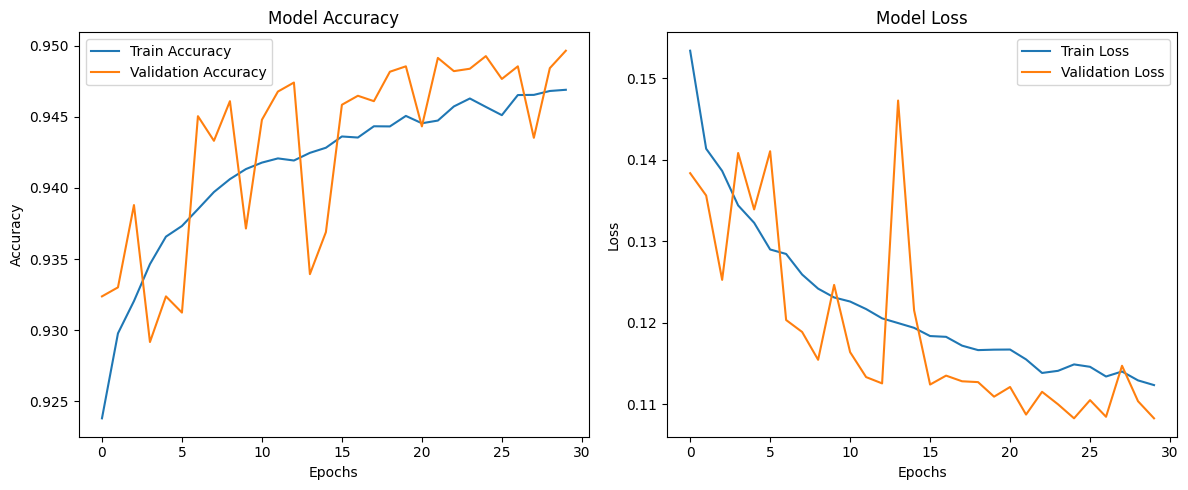

In [99]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Save the Model
Save the trained model for submission.

In [100]:
model.save('ANN_model_W4.h5')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here: